In [3]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
sys.path.append("./npy")
import utilities as util

In [4]:
# modifica questi dati
start_index = 0        
end_index = 10000 
filename = "Channel55.csv"
file_path = os.path.join("../timeseries/B101/", filename)

In [5]:
df = util.load_dataframe(file_path)
data = df["singleData"].values
subset_data = data[start_index:end_index]

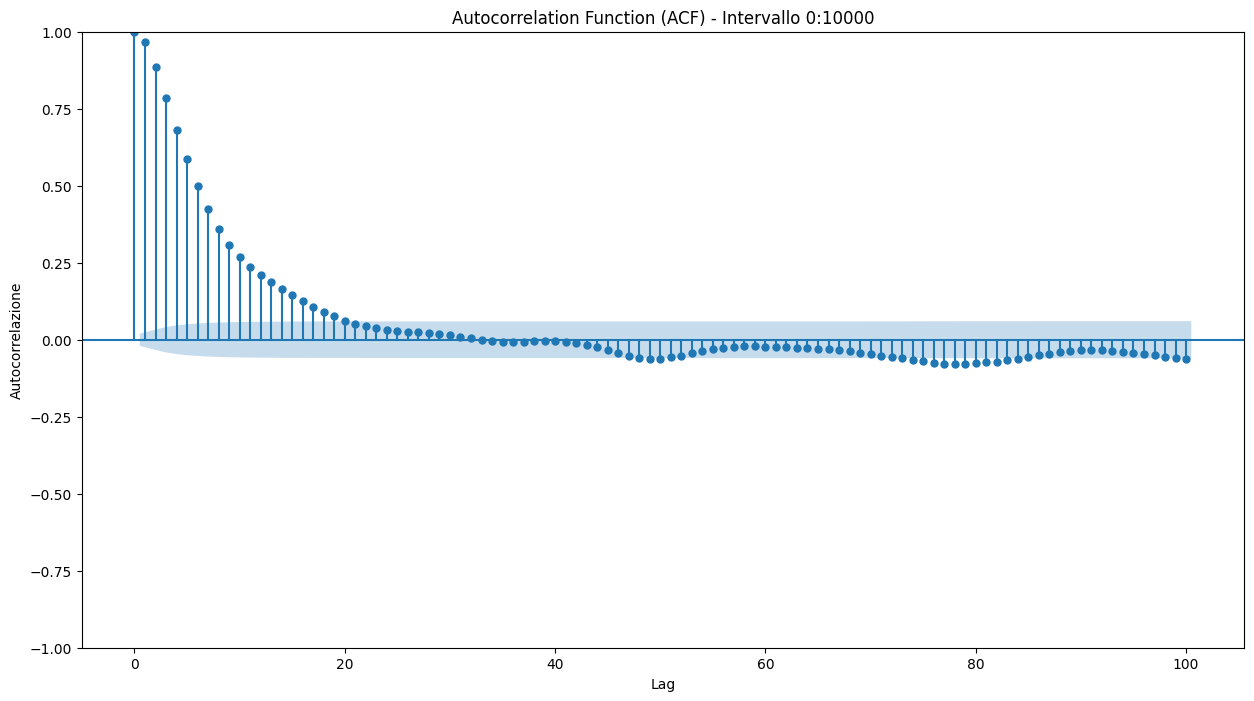

In [6]:
# Plot Autocorrelation Function (ACF) per la porzione selezionata
fig, ax = plt.subplots(figsize=(15, 8))  # Definisce esplicitamente la figura e gli assi
# plt.figure(figsize=(30, 15))
lags = min(100, len(subset_data) // 5)  # Adatta il numero di lag automaticamente
plot_acf(subset_data, lags=lags, alpha=0.05, ax=ax)
plt.title(f"Autocorrelation Function (ACF) - Intervallo {start_index}:{end_index}")
plt.xlabel("Lag")
plt.ylabel("Autocorrelazione")
plt.show()

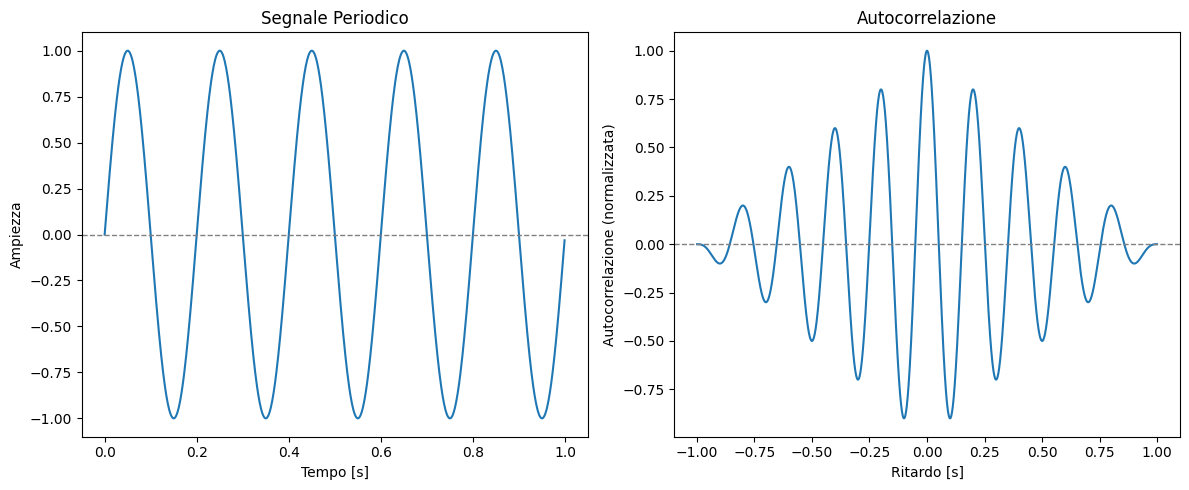

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri del segnale
frequenza = 5  # Hz
ampiezza = 1.0
durata = 1.0  # secondi
fs = 1000  # frequenza di campionamento in Hz

# Genera il tempo e il segnale periodico (onda sinusoidale)
t = np.linspace(0, durata, int(fs * durata), endpoint=False)
segnale = ampiezza * np.sin(2 * np.pi * frequenza * t)

# Calcola l'autocorrelazione
autocorrelazione = np.correlate(segnale, segnale, mode='full')
autocorrelazione = autocorrelazione / np.max(autocorrelazione)  # normalizza

# Asse dei ritardi
ritardi = np.arange(-len(segnale) + 1, len(segnale))

# Plot del segnale e della sua autocorrelazione
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, segnale)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Segnale Periodico')
plt.xlabel('Tempo [s]')
plt.ylabel('Ampiezza')

plt.subplot(1, 2, 2)
plt.plot(ritardi / fs, autocorrelazione)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('Autocorrelazione')
plt.xlabel('Ritardo [s]')
plt.ylabel('Autocorrelazione (normalizzata)')

plt.tight_layout()
plt.show()


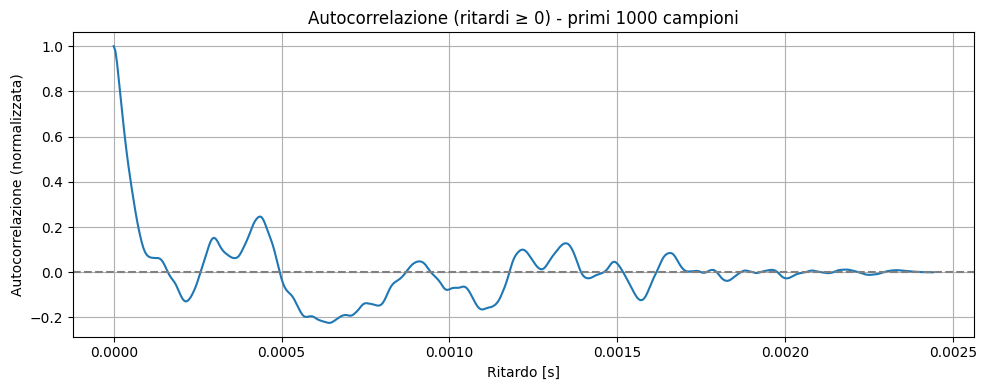

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Frequenza di campionamento
fs = 204500  # Hz

# Supponiamo che il DataFrame si chiami df e la colonna con la time series sia 'valore'
# Esempio: df = pd.read_csv('tuo_file.csv')
# df['valore'] deve essere la colonna contenente il segnale

# Prendi i primi 1000 campioni
ts = df['singleData'].iloc[:500].to_numpy()

# Calcola l'autocorrelazione
autocorr = np.correlate(ts, ts, mode='full')
autocorr = autocorr / np.max(autocorr)  # normalizzazione

# Asse dei ritardi in secondi
lags = np.arange(-len(ts) + 1, len(ts)) / fs

# Parte causale (ritardi >= 0)
lags_pos = lags[lags >= 0]
autocorr_pos = autocorr[len(ts)-1:]

# Plot
plt.figure(figsize=(10, 4))
plt.plot(lags_pos, autocorr_pos)
plt.axhline(0, color='gray', linestyle='--')
plt.title('Autocorrelazione (ritardi ≥ 0) - primi 1000 campioni')
plt.xlabel('Ritardo [s]')
plt.ylabel('Autocorrelazione (normalizzata)')
plt.grid(True)
plt.tight_layout()
plt.show()


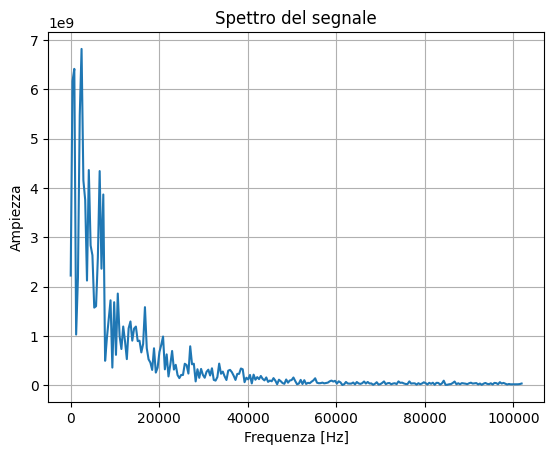

In [19]:
from scipy.fft import fft, fftfreq

N = len(ts)  # numero di campioni
yf = np.abs(fft(ts))
xf = fftfreq(N, 1/fs)

plt.plot(xf[:N//2], yf[:N//2])  # solo parte positiva
plt.title("Spettro del segnale")
plt.xlabel("Frequenza [Hz]")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.show()

Frequenze dominanti (Hz): [ 613.5 1431.5 2045.  2454.  3067.5]
Frequenza principale: 613.50 Hz
Periodo corrispondente: 1.630 ms


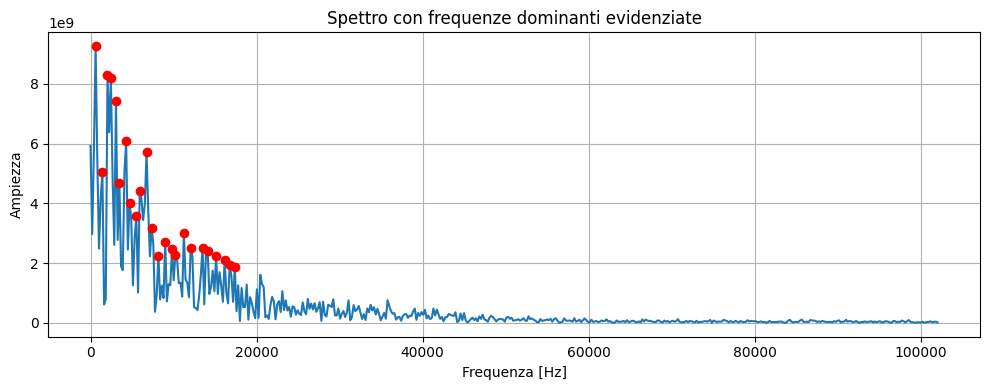

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

# Time series: primi 1000 campioni (o tutta se preferisci)
ts = df['singleData'].iloc[:1000].to_numpy()
fs = 204500  # frequenza di campionamento in Hz

# Calcola FFT
N = len(ts)
yf = np.abs(fft(ts))
xf = fftfreq(N, 1/fs)

# Considera solo la parte positiva dello spettro
xf_pos = xf[:N//2]
yf_pos = yf[:N//2]

# Trova i picchi principali nello spettro
picchi, _ = find_peaks(yf_pos, height=np.max(yf_pos)*0.2)  # threshold al 20% del massimo
frequenze_dominanti = xf_pos[picchi]

# Stampa le prime frequenze dominanti
print("Frequenze dominanti (Hz):", frequenze_dominanti[:5])

# Calcola e stampa il periodo della frequenza dominante
if len(frequenze_dominanti) > 0:
    freq_principale = frequenze_dominanti[0]
    periodo = 1 / freq_principale
    print(f"Frequenza principale: {freq_principale:.2f} Hz")
    print(f"Periodo corrispondente: {periodo*1e3:.3f} ms")
else:
    print("Nessun picco dominante rilevato.")

# Plot
plt.figure(figsize=(10, 4))
plt.plot(xf_pos, yf_pos)
plt.plot(frequenze_dominanti, yf_pos[picchi], "ro")
plt.title("Spettro con frequenze dominanti evidenziate")
plt.xlabel("Frequenza [Hz]")
plt.ylabel("Ampiezza")
plt.grid(True)
plt.tight_layout()
plt.show()

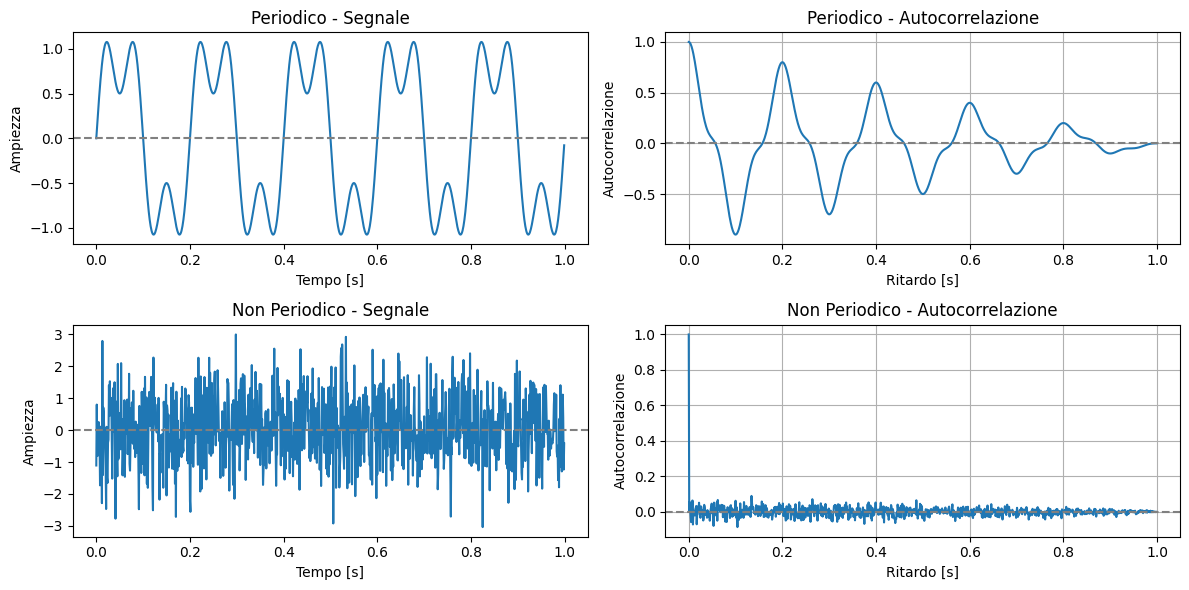

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri comuni
fs = 1000  # Hz
N = 1000   # numero di campioni
t = np.linspace(0, N/fs, N, endpoint=False)

# Segnale periodico: somma di due sinusoidi
signal_periodic = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 15 * t)

# Segnale non periodico: rumore bianco
signal_random = np.random.randn(N)

def plot_autocorrelation(signal, fs, title, subplot_idx):
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr / np.max(autocorr)  # normalizza
    lags = np.arange(-len(signal) + 1, len(signal)) / fs
    lags_pos = lags[lags >= 0]
    autocorr_pos = autocorr[len(signal)-1:]

    plt.subplot(2, 2, subplot_idx)
    plt.plot(t, signal)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{title} - Segnale')
    plt.xlabel('Tempo [s]')
    plt.ylabel('Ampiezza')

    plt.subplot(2, 2, subplot_idx + 1)
    plt.plot(lags_pos, autocorr_pos)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f'{title} - Autocorrelazione')
    plt.xlabel('Ritardo [s]')
    plt.ylabel('Autocorrelazione')
    plt.grid(True)

plt.figure(figsize=(12, 6))
plot_autocorrelation(signal_periodic, fs, 'Periodico', 1)
plot_autocorrelation(signal_random, fs, 'Non Periodico', 3)
plt.tight_layout()
plt.show()